# Figure 3 experiments

With this jupyter notebook, it is possible to replicate the experiments shown in Figure 3 of "Typing assumptions improve identification in causal discovery" that investigates the size of the t-MEC. In a first step, the experiments are performed and in a second step, the results are plotted. Set n_graph to 100

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

## Run experiments

In [2]:
from main import compare_tmec_size

# to perform quick tests, can run with small value for n_graph and a smaller range for n_node_list
results_folder = "results"
n_type_list = [10]
n_node_list = range(10, 101, 10)
probs_inter_list = [0.2]
probs_intra_list = [0.0, 0.1, 0.3, 0.5]


compare_tmec_size(results_folder,
                  "",
                  n_type_list,
                  n_node_list,
                  probs_inter_list,
                  probs_intra_list,
                  n_graph=10,
                  n_cpu=1,
                  verbose=False)


KeyboardInterrupt: 

## Plot results

In [6]:
results_path = f"{results_folder}/results.csv"
p_inter = 0.2
n_types = 10

# Matplotlib style
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 11}
matplotlib.rc('font', **font)
ticks = {'labelsize': 9}
matplotlib.rc('xtick', **ticks)
matplotlib.rc('ytick', **ticks)

r = pd.read_csv(results_path)
r.head()

,Unnamed: 0,graph_i,mec_size,n_nodes,n_types,prob_inter,prob_intra,runtime,tmec_size,unoriented_tedges
0,0,0,12,10,10,0.2,0.3,0.032929,12,4
1,1,0,72,20,10,0.2,0.3,0.316415,36,4
2,2,0,35,30,10,0.2,0.3,0.113867,4,2
3,3,0,32,40,10,0.2,0.3,0.275640,4,1
4,4,0,64,50,10,0.2,0.3,0.558023,3,0


### Plotting of Figure 3

### (a) Number of unoriented t-edges w.r.t. the number of vertices 

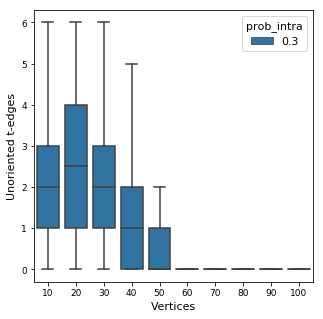

In [7]:
plot_data = pd.DataFrame(r)
ax = sns.boxplot(data=plot_data.loc[(plot_data.prob_intra == 0.1) | (plot_data.prob_intra == 0.3) | (plot_data.prob_intra == 0.5)], 
                 x="n_nodes", y="unoriented_tedges", hue="prob_intra", showfliers=False)


plt.gcf().set_size_inches(w=5, h=5)
plt.xlabel("Vertices")
plt.ylabel("Unoriented t-edges")
plt.legend(title="$p_{intra}$")
plt.savefig(f"{results_folder}/fig_3a.pdf", bbox_inches="tight")

###  (b) Size of the MEC and the t-MEC w.r.t. the number of vertices when pintra = 0

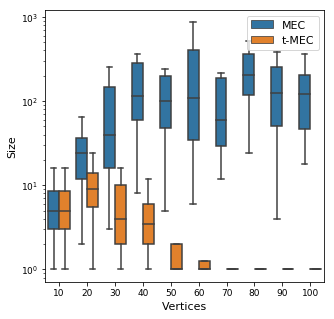

In [17]:
# Transform dataframe to facilitate plotting
plot_data = pd.DataFrame(r)
plot_data = pd.concat((plot_data, plot_data))
plot_data["type"] = ["MEC"] * (plot_data.shape[0] // 2) + ["t-MEC"] * (plot_data.shape[0] // 2)
plot_data["size"] = plot_data.iloc[: plot_data.shape[0] // 2]["mec_size"].tolist() + plot_data.iloc[: plot_data.shape[0] // 2]["tmec_size"].tolist()
del plot_data["mec_size"], plot_data["tmec_size"]

plot_data = pd.DataFrame(plot_data.loc[(plot_data.n_types == 10) & (plot_data.prob_inter == p_inter) & (plot_data.prob_intra == 0.0)])
sns.boxplot(data=plot_data, x="n_nodes", y="size", hue="type", showfliers=False)
plt.yscale("log")
plt.xlabel("Vertices")
plt.ylabel("Size")
plt.legend(title=None, loc="upper right")
plt.gcf().set_size_inches(w=5, h=5)
plt.savefig(f"{results_folder}/fig_3b.pdf", bbox_inches="tight")

### (c) Ratio of the size of t-MEC and the size of MEC w.r.t. the number of vertices

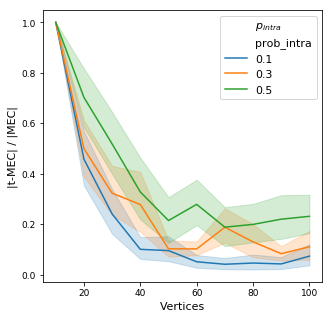

In [18]:
pii_to_plot = [0.1, 0.3, 0.5]
plot_data = pd.DataFrame(r.loc[(r.n_types == 10) & (r.prob_inter == p_inter) & ([any(np.isclose(row.prob_intra, pii) for pii in pii_to_plot) for _, row in r.iterrows()])])
plot_data["ratio"] = plot_data["tmec_size"] / plot_data["mec_size"]

sns.lineplot(data=plot_data, x="n_nodes", y="ratio", hue="prob_intra", palette=sns.color_palette()[: len(pii_to_plot)])
plt.xlabel("Vertices")
plt.ylabel("|t-MEC| / |MEC|")
plt.legend(title="$p_{intra}$")
plt.gcf().set_size_inches(w=5, h=5)
plt.savefig(f"{results_folder}/fig_3c.pdf", bbox_inches="tight")